# Week 1  

## Steps in ML projects
1. Look at the big picture.
2. Get the data.
3. Discover and visualize the data to gain insights.
4. Prepare the data for Machine Learning algorithms.
5. Select a model and train it.
6. Fine-tune your model.
7. Present your solution.
8. Launch, monitor and maintain your system.

### Step 1: Look at the big picture
1. Frame the problem
2. Select a performance measure
3. List and check the assumptions

**1.1 Frame the problem**
  * What is input and output?
  * What is the business objective? How does company expects to use and benefit from the model?
  * What is the current solution (if any)?
  * provides a useful baseline

> **Design consideration in problem framing**
> * Is this a **supervised, unsupervised or a RL** problem?
> * Is this a **classification, regression** or some other tast?
> * What is the nature of the output: **single** or **multiple** outputs?
> * Does system need **continuous learning** or **periodic updates**?
> * What would be the learning style: **batch** or **online**?

**1.2 Selection of performance measure**
* Regression
  * Mean Squared Error (MSE) or
  * Mean Absolute Error (MAE)
* Classification
  * Precision
  * Recall
  * F1-score
  * Accuracy
  
**1.3 Check the assumptions**
* List down various assumptions about the task.
* Review with domain experts and other teams that plan to consume ML output.
* Make sure all assumptions are reviewed and approved before coding!

> It's a good idea to understand significance of each feature by consulting the experts.

# Step 2: Get the data

Load basic libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# download data
dataUrl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataUrl, sep=';')

## Examine data

In [3]:
# check data samples
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]
print('Feature list:', feature_list)
print('Label:', label)

Feature list: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


### Data Statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Count')

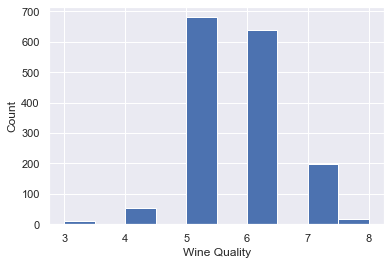

In [8]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

**Before any further exploration, it's a good idea to separate test set and do not look at it in order to have a clean evaluation set.**  
Otherwise it may cause ***data snooping bias***

Scikit-Learn provides a few functions for creating test sets based on:
1. **Random sampling**, which randomly selects k% points in the test set.
2. **Stratified sampling**, which samples test examples such that they are representative of overall distribution.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
? train_test_split()

Object ` train_test_split()` not found.


In [11]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

#### Statified Sampling
* Data distribution may not be uniform in real world data.
* Ramdom sampling - by its nature - introduces bias in such data sets.

> Recall the label distribution in our dataset: It's not uniform  
> hench with random sampling test distribution may not match with the overall distribution.

How do we sample in such cases?
* We divide the population into homogeneous groups called **strata**.
* Data is sampled from each stratum so as to match it with the overall data distribution.
* Scikit-Learn provides a class ***StratifiedShuffleSplit*** that helps us in stratified sampling.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['quality']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
    
strat_dist = strat_test_set['quality'].value_counts() / len(strat_test_set)

# Step 3: Data Visualization
* Performed on training set.
* In case of large training set -
  * Sample examples to form **exploration set**.
* Enables to understand features and their relationship among themselves and with output label.

*It's a good idea to create a copy of the training set so that we can freely manipulate it without worrying about the original dataset.*

## Scatter Visualization

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

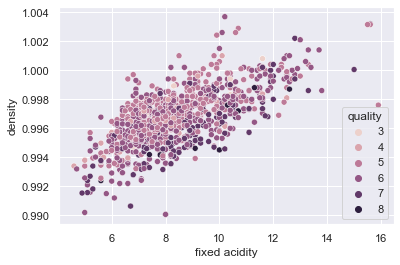

In [13]:
# with seaborn library:
exploration_set = train_set
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=exploration_set)

<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

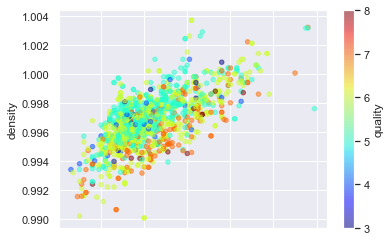

In [14]:
# with matplotlib:
exploration_set.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5, c='quality', cmap=plt.get_cmap('jet'))

## Relationship between features
* **Standard correlation coefficient** between features.
  * Ranges between -1 and 1.
    * **Correlation = +1**: Strong positive correlation
    * **Correlation = -1**: Strong negative correlation
    * **Correlation = 0**: No linear correlation between features

  * Visualization with heat map
* Only captures linear relationships between features.
  * For non-linear relationship, use **rank correlation**

In [15]:
# Let's calculate the correlation between our features
corr_matrix = exploration_set.corr()

In [16]:
# Let's check features that are correlated with the label, which is quality in our case.
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.472676
sulphates               0.242596
citric acid             0.216115
fixed acidity           0.122488
residual sugar          0.005425
pH                     -0.045185
free sulfur dioxide    -0.055860
chlorides              -0.126541
density                -0.167091
total sulfur dioxide   -0.200067
volatile acidity       -0.378372
Name: quality, dtype: float64

<AxesSubplot:>

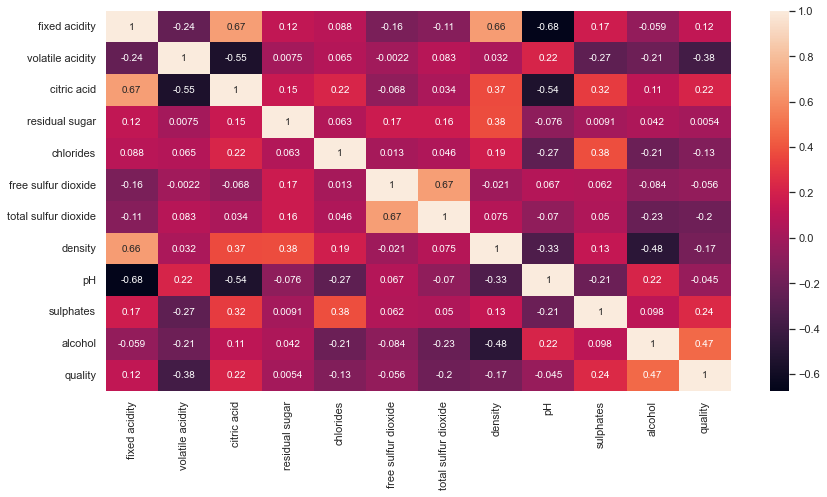

In [17]:
# Let's visualize the correlation matrix with heatmap:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

array([[<AxesSubplot:xlabel='citric acid', ylabel='citric acid'>,
        <AxesSubplot:xlabel='pH', ylabel='citric acid'>,
        <AxesSubplot:xlabel='alcohol', ylabel='citric acid'>,
        <AxesSubplot:xlabel='sulphates', ylabel='citric acid'>,
        <AxesSubplot:xlabel='quality', ylabel='citric acid'>],
       [<AxesSubplot:xlabel='citric acid', ylabel='pH'>,
        <AxesSubplot:xlabel='pH', ylabel='pH'>,
        <AxesSubplot:xlabel='alcohol', ylabel='pH'>,
        <AxesSubplot:xlabel='sulphates', ylabel='pH'>,
        <AxesSubplot:xlabel='quality', ylabel='pH'>],
       [<AxesSubplot:xlabel='citric acid', ylabel='alcohol'>,
        <AxesSubplot:xlabel='pH', ylabel='alcohol'>,
        <AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='sulphates', ylabel='alcohol'>,
        <AxesSubplot:xlabel='quality', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='citric acid', ylabel='sulphates'>,
        <AxesSubplot:xlabel='pH', ylabel='sulphates'>,
        <A

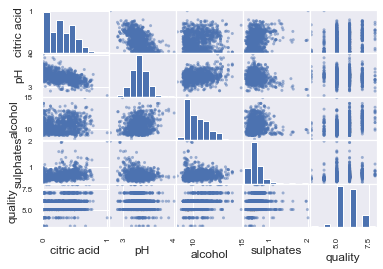

In [18]:
# Another option to visualize the relationship between the feature is with scatter matrix
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
scatter_matrix(exploration_set[attribute_list])

### Note of wisdom
1. Visualization and data exploration do not have to be absolutely thorough.
2. Objective is to get quick insight into features and its relationship with other features and labels.
3. Exploration is an iterative process: Once we build model and obtain more insights, we can come back to this step.

# Step 4: Prepare data for ML algorithm
We often need to preprocess the data before using it for model building due to variety of reasons:
  * Due to errors in data capture, data may contain outliers or missing values.
  * Different features may be at different scales.
  * The current data distribution is not exactly amenable to learning.

Typical steps in data preprocessing are as follows:
  1. Separate features and labels.
  2. Handling missing values and ourtliers.
  3. Feature scaling to bring all features on the same scale.
  4. Applying certain transformations like log, square root, etc. on the features.

*It's a good practice to make a copy of the data and apply preprocessing on that copy. This ensures that in case something goes wrong, we will at leat have the original copy of the data intact.*

### 4.1 Separate features and labels from the training set.

In [19]:
# Copy all features leaving aside the label.
wine_features = strat_train_set.drop('quality', axis=1)

# Copy the label list
wine_labels = strat_train_set['quality'].copy()

### 4.2 Data Cleaning
Let's first check if there are any missing values in feature set: One way to find that out is column-wise.

In [20]:
wine_features.isna().sum()
# counts the number of NaN values in each column of wine_features

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In case, we have non-zera numbers in any columns, we have a problem of missing values.
  * These values are missing due to errors in recording or they do not exist.
  * If they are not recorded:
    * Use imputation technique to fill up the missing values.
    * Drop the rows containing missing values.
  * If they do not exists, it is better to keep it as NaN.

  Sklearn provides the following methods to drop rows containing missing values:
    * dropna()
    * drop()

> It provides *SimpleImputer* class for filling up missing values with say, median value.

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [22]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [23]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [24]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [25]:
tr_features = imputer.transform(wine_features)
# This returns a Numpy array and we can convert it to the dataframe if needed

In [26]:
tr_features.shape

(1279, 11)

In [27]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)

### 4.3 Handling text and categorical attributes
> Converting categories to numbers:

In [28]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

* Call fit_transform() method on ordinal_encoder object to convert text to numbers.
* The list of categories can be obtained via categories_instance variable.

***One issue with this representation is that the ML algorithm would assume that the two nearby values are closer than the distinct ones.***

#### Using one hot encoding
* Here we create one binary feature per category - the feature value is 1 when the category is present else it is 0.
* Only one feature is 1 (hot) and rest are 0 (cold).
* The new features are referred to as *dummy features*.
* Scikit-Learn provides a **OneHotEncoder** class to convert categorical values into one-hot vectors.

In [29]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

* We need to call `fit_transform()` method on `OneHotEncoder` object.
* The output is a SciPy sparse matrix rather than NumPy array. This enables us to save space when we have a huge number of categories.
* In case we want to convert it to dense representation, we can do so with `toarray()` method.
* The list of categories can be obtained via `categories_` instance variable.
* As we observed that when the number of categories are very large, the one-hot encoding would result in a very large number of features.
  * This can be addressed with one of the following approaches:
    * Replace with categorical numerical features
    * Convert into low-dimensional learnable vectors called **embeddings**

### 4.4 Feature Scaling
* Min-max scaling or Normalization
  * we subtract minimum value of a feature from the current value and divide it by the difference between the minimum and the maximum value of that feature.
  * Values are shifted and scaled so that they range between 0 and 1.
  * Scikit-Learn provides `MinMaxScalar` transformer for this.
  * One can specify hyperparameter `feature_range` to specify the range of the feature.
  
* Standardization
  * We subtract mean value of each feature from the current value and divide it by the standard deviation so that the resulting feature has a unit variance.
  * While *normalization* bounds values between 0 and 1, *standardiztion* does not bound values to a specific range.
  * Standardization is less affected by the outliers compared to the normalization.
  * Scikit-Learn provides `StandardScaler` transformation for feature standardization.
  * Note that all these transformers are learnt on the **training data** and then applied on the training and test data to transform them.
  * **Never learn these transformers on the full dataset.**
  


**Transformation pipeline**
* Scikit-Learn provides a Pipeline class to line up transformations in an intended order.
* Here is an example pipeline:

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([
                                ('imputer', SimpleImputer(strategy='median')),
                                ('std_scaler', StandardScaler()),])
wine_features_tr = transform_pipeline.fit_transform(wine_features)

Let's understand what is happening here:
* **Pipeline** has a sequence of transformations - misssing value imputaion followed by standardization.
* Each step in the sequence is defined by **name, estimator** pair.
* Each name should be unique and **should not contain** __ (double underscore).
* The output of one step is passed on the next one in sequence untile it reaches the last step.
  * Here the pipeline first performs imputation of the missing values and its result is passed for standardization.
* Here *StandardScaler* is the last estimator and since it is a transformer, we call `fit_transform()` method on the **Pipeline** object.

**How to transform mixed features?**
* The real world data has both categorical as well as numerical features and we need to apply different transformations to them.
* Scikit-Learn introduced `ColumnTransformer` for this purpose.

Below is an example code snippet:
```python
from sklearn.compose import ColumnTransformer
num_attribs = list(wine_features)
cat_attribs = ['place_of_manufacturing']
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
     ])
wine_features_tr = full_pipeline.fit_transform(wine_features)
```
* Here the `ColumnTransformer` applies each transformation to the appropriate columns and then concatenates the outputs along the columns.
* Note all the transformers must return the same number of rows.

# Step 5: Select and train ML model
* It's a good practice to build a quick baseline model on the preprocessed data and get an idea about model performance.

*Since the quality is a number we can use Linear Regression model as a quick baseline*.

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

Now that we have a working model of a regression, let's evaluate performance of the model on training as well as test sets.
  * For regression models, we can use mean squared error as an evaluation measure.

In [32]:
from sklearn.metrics import mean_squared_error

quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.4206571060060278

Let's evaluate perfomance on the test set.
* We need to first apply transformation on the test set and then apply the model prediction function.

In [33]:
# copy all the features leaving aside the label.
wine_features_test = strat_test_set.drop('quality', axis=1)

# copy the label list
wine_labels_test = strat_test_set['quality'].copy()

# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

# call predict function and calculate MSE.
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.3975913087501518

Let's visualize the error between the actual and predicted values.

Text(0, 0.5, 'Predicted quality')

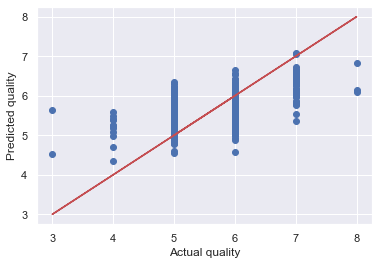

In [34]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

*The model seem to be making errors on the best and poor quality wines*.

**Let's try another model: `DecisionTreeRegressor`**.

In [35]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

In [36]:
# training error
quality_predictions = tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.0

In [37]:
# test error
quality_test_predictions = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.640625

Note that the training error is 0, while the test error is 0.62.  
This is an example of an overfitted model.

Text(0, 0.5, 'Predicted quality')

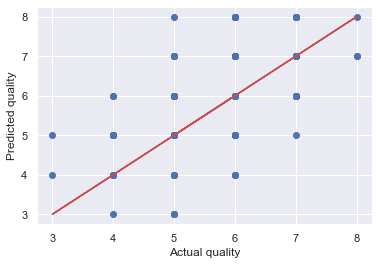

In [38]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

*You can see that the predictions are all over the place*

#### We can use **cross-validation** (CV) for robust evaluation of model performance.

In [39]:
from sklearn.model_selection import cross_val_score

* Cross validation provides a separate MSE for each validation set, which we can use to get a mean estimation of MSE as well as the standard deviation, which helps us to determine how precise is the estimate
* The additional cost we pay in cross validation is additional training runs, which may be too expensive in certain cases.

In [40]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [41]:
# Linear Regression CV
scores = cross_val_score(lin_reg, wine_features_tr, wine_labels, scoring="neg_mean_squared_error", cv=10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores:  [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean:  0.431639217212196
Standard deviation:  0.08356359730413969


In [42]:
# Decision Tree CV
scores = cross_val_score(tree_reg, wine_features_tr, wine_labels, scoring='neg_mean_squared_error', cv=10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores:  [0.5625     0.71875    0.6171875  0.5546875  0.4296875  0.515625
 0.6015625  0.734375   0.8515625  0.97637795]
Mean:  0.6562315452755906
Standard deviation:  0.15664137496561015


***Since the mean and standard deviation of LinReg is smaller than that of DT, LinReg has better MSE and more precise estimation compared to DT.***

#### Random forest CV
Ensemble learning methods have often found to improve the performance of ML models.

In [43]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)

scores = cross_val_score(forest_reg, wine_features_tr, wine_labels, scoring='neg_mean_squared_error', cv=10)
forest_mse_scores = -scores
display_scores(tree_mse_scores)

Scores:  [0.5625     0.71875    0.6171875  0.5546875  0.4296875  0.515625
 0.6015625  0.734375   0.8515625  0.97637795]
Mean:  0.6562315452755906
Standard deviation:  0.15664137496561015


*There could be some error in this case, but you'll see that the MSE and variability is less than the previous 2 models*

In [44]:
# Calulate and plot the MSE on test set
quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.341285625

Text(0, 0.5, 'Predicted quality')

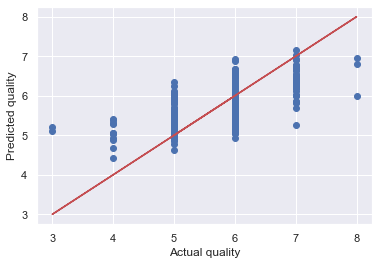

In [45]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

Random forest looks more promising than the other two models.
* It's a good practice to build a few such models quickly without tuning their hyperparameters and shortlist a few promising models among them.
* Also save the models to the disk in Python ***pickle*** format.

# Step 6: Finetune your model
* Usually there are a number of hyperparameters in the model, which are set manually.
* Tuning these hyperparameters leads to better accuracy of ML models.
* Finding the best combination of hyperparameters is a search problem in the huge space of hyperparameters.

#### Grid search
* Scikit-Learn provides a class `GridSearchCV` that helps us in this pursuit.
* We need to specify a list of hyperparameters along with the range of values to try.
* It automatically evaluates all possible combinations of hyperparameter values using cross-validation.

Let's perform Grid search in **RandomForest regression**:  
There are number of hyperparameters in RandomForest regression such as:
  * Number of estimators
  * Maximum number of features

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators':[3, 10], 'max_features': [2, 3, 4]},
]

Here the parameter grid contains two combinations:
1. This first combination contains *n_estimators* with 3 values and max_features with 4 values.
2. The second combination has an additional *bootstrap* parameter, which is set to False. Note that is was set to its default value, which is True, in the first grid.

Let's compute the total combinations evaluated here:
1. The first one results in 3x4 = 12 combinations
2. The second one has 2x3 = 6 combinations
Total number of combinations evaluated by the parameter grid 12+6 = 18

In [47]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

* In this case, we set cv=5 i.e. using 5 fold cross validation for training the model.
* The total model training runs = 18x5 = 90

In [48]:
grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
# The best parameter combination can be obtained as follows:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [50]:
# The error at different parameter settings:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params)

0.4919580610021786 {'max_features': 2, 'n_estimators': 3}
0.3814335784313725 {'max_features': 2, 'n_estimators': 10}
0.3547548883442265 {'max_features': 2, 'n_estimators': 30}
0.44697269880174284 {'max_features': 4, 'n_estimators': 3}
0.3772690870098038 {'max_features': 4, 'n_estimators': 10}
0.3604897399237473 {'max_features': 4, 'n_estimators': 30}
0.4968433415032679 {'max_features': 6, 'n_estimators': 3}
0.3867770526960784 {'max_features': 6, 'n_estimators': 10}
0.3676872344771242 {'max_features': 6, 'n_estimators': 30}
0.48534211601307187 {'max_features': 8, 'n_estimators': 3}
0.3875621323529411 {'max_features': 8, 'n_estimators': 10}
0.36646243872549017 {'max_features': 8, 'n_estimators': 30}
0.4557223583877995 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.368733118872549 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.47380276416121997 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.38538455882352946 {'bootstrap': False, 'max_features': 3

In [51]:
# Obtain the best estimator as follows:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

**Note**: `GridSearchCV` is initialised with *refit=True* option, which retrains the best estimator on the full training set. This is likely to lead us to a better model as it is trained on a larger dataset.

#### Randomized Search
* When we have a large hyperparameter space, it is desirable to try `RandomizedSearchCV`.
* It selects a random value for each hyperparameter at the start of each iteration and repeats the process for a given number of random combinations.
* It enables us to search hyperparameter space with appropriate budget control.

```python
from sklearn.model_selection import RandomizedSearchCV
```

#### Analysis of best model and its error
Analysis of model provides useful insights about features.  
Let's obtain the feature importance as learnt by the model:

In [52]:
feature_importances = grid_search.best_estimator_.feature_importances_

sorted(zip(feature_importances, feature_list), reverse=True)

[(0.17610605293048073, 'alcohol'),
 (0.1335115343175319, 'sulphates'),
 (0.11611009204742148, 'volatile acidity'),
 (0.0917087389284074, 'total sulfur dioxide'),
 (0.08869818255047993, 'density'),
 (0.07219389366912266, 'chlorides'),
 (0.07109664589754003, 'citric acid'),
 (0.07050036282038287, 'fixed acidity'),
 (0.06468204452841878, 'pH'),
 (0.05936426311452416, 'residual sugar'),
 (0.05602818919569005, 'free sulfur dioxide')]

* Based on this information, we may drop features that are not so important, and repeat the entire process on the reduced feature set.
* It is also useful to analyze the errors in prediction and understand its causes and fix them. (take help from domain experts)

#### Evaluation on test set
Now that we have a reasonable model, we evaluate its performance based on the test set.  
The following steps are involved in the process:

1. Transform the test features.

In [53]:
# Copy all the features leaving aside the label.
wine_features_test = strat_test_set.drop('quality', axis=1)

# Copyt the label list
wine_labels_test = strat_test_set['quality'].copy()

# Apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

2. Use the predict method with the trained model and the transformed test set.

In [54]:
quality_test_predictions = grid_search.best_estimator_.predict(wine_features_test_tr)

3. Compare the predicted labels with the actual ones and report the evaluation metrics.

In [55]:
mean_squared_error(wine_labels_test, quality_test_predictions)

0.3481006944444444

4. It is a good idea to get 95% confidence interval of the evaluation metric. It can be obtained by the following code:

In [56]:
from scipy import stats
confidence = 0.95
squared_errors = (wine_labels_test - quality_test_predictions) ** 2
stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors))

(0.2838823609261543, 0.4123190279627345)

# Step 7: Present your solution
Once we have a satisfactory model based on its performance on the test set, we reach the prelaunch phase.
1. Before launch we need to present our solution which highlights learnings, assumptions and systems limitation.
2. Document everything, create clear visualizations and present the model.
3. In case, the model does not work better than the experts, it may still be a good idea to launch it and free up bandwidths of human experts.

# Step 8: Launch, monitor and maintain your system
Launch
* Plug in input sources and
* write test cases

Monitoring
* System outages
* Degradation of model performance
* Sampling predictions for human evaluation
* Regular assessment of data quality, which is critical for model perfomance

Maintainance
* Train model regularly every fixed interval with fresh data.
* Production roll out of the model.